In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import urllib
dataset = 'mnist.pkl.gz'
def reporthook(a,b,c):
    print "\rdownloading: %5.1f%%"%(a*b*100.0/c),
    
if not os.path.isfile(dataset):
        origin = "https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz"
        print('Downloading data from %s' % origin)
        urllib.urlretrieve(origin, dataset, reporthook=reporthook)

downloading: 100.0%


In [4]:
import gzip
import pickle
with gzip.open(dataset, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)

In [5]:
print "train_set", train_set[0].shape, train_set[1].shape
print "valid_set", valid_set[0].shape, valid_set[1].shape
print "test_set", test_set[0].shape, test_set[1].shape

train_set (50000, 784) (50000,)
valid_set (10000, 784) (10000,)
test_set (10000, 784) (10000,)


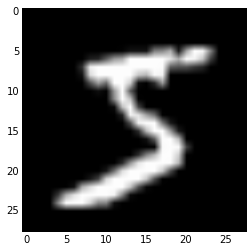

In [6]:
imshow(train_set[0][0].reshape((28, 28)), cmap="gray")

5
0
4
1
9


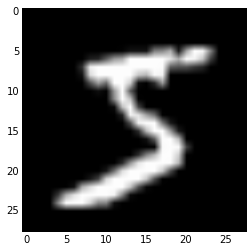

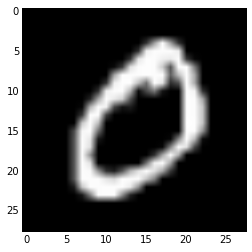

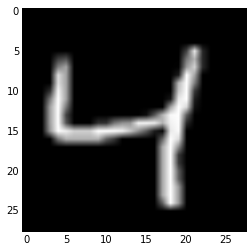

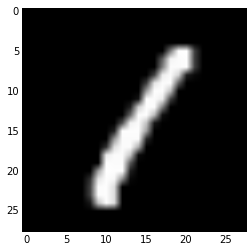

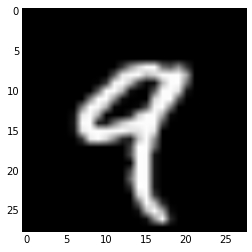

In [6]:
def show(x, i=[0]):
    plt.figure(i[0])
    imshow(x.reshape((28,28)), cmap="gray")
    i[0]+=1
for i in range(5):
    print train_set[1][i]
    show(train_set[0][i])

In [7]:
W = np.random.uniform(low=-1, high=1, size=(28*28,10))
b = np.random.uniform(low=-1, high=1, size=10)


# $softmax_i(W x + b)  = \frac {e^{W_i x + b_i}} {\sum_j e^{W_j x + b_j}}$


In [8]:
x = train_set[0][0]
y = train_set[1][0]

In [9]:
Pr = exp(dot(x, W)+b)
Pr.shape

(10,)

In [10]:
Pr = Pr/Pr.sum()
print Pr

[  2.01602484e-03   1.99061601e-03   1.16453882e-04   1.51807564e-04
   9.57523439e-03   1.09162706e-05   5.59743151e-03   2.34128592e-02
   8.27970958e-01   1.29157698e-01]




# $ error = - \log(P(Y=y^{(i)}|x^{(i)}, W,b)) $


In [11]:
loss = -log(Pr[y])
loss

11.425256169720567

In [12]:
gradb = Pr.copy()
gradb[y] -= 1
print gradb

[  2.01602484e-03   1.99061601e-03   1.16453882e-04   1.51807564e-04
   9.57523439e-03  -9.99989084e-01   5.59743151e-03   2.34128592e-02
   8.27970958e-01   1.29157698e-01]


In [13]:
print Pr.shape, x.shape, W.shape
gradW = dot(x.reshape(784,1), Pr.reshape(1,10), )
gradW[:, y] -= x

(10,) (784,) (784, 10)


In [16]:
W -= 0.1 * gradW
b -= 0.1 * gradb

In [17]:
Pr = exp(dot(x, W)+b)
Pr = Pr/Pr.sum()
loss = -log(Pr[y])
loss

0.24405672999542433

In [9]:
W = np.random.uniform(low=-1, high=1, size=(28*28,10))
b = np.random.uniform(low=-1, high=1, size=10)
score = 0
N=50000*30
d = 0.001
learning_rate = 1e-2
for i in xrange(N):
    if i%50000==0:
        print i, "%5.3f%%"%(score*100)
    x = train_set[0][i%50000]
    y = train_set[1][i%50000]
    Pr = exp(dot(x, W)+b)
    Pr = Pr/Pr.sum()
    loss = -log(Pr[y])
    score *=(1-d)
    if Pr.argmax() == y:
        score += d
    gradb = Pr.copy()
    gradb[y] -= 1
    gradW = dot(x.reshape(784,1), Pr.reshape(1,10), )
    gradW[:, y] -= x
    W -= learning_rate * gradW
    b -= learning_rate * gradb
    

0 0.000%
50000 87.597%
100000 89.413%
150000 89.595%
200000 90.032%
250000 90.249%
300000 90.584%
350000 90.729%
400000 90.793%
450000 91.026%
500000 91.068%
550000 91.159%
600000 91.338%
650000 91.415%
700000 91.542%
750000 91.786%


KeyboardInterrupt: 

In [11]:
def compute_Pr(x):
    Pr = exp(dot(x, W)+b)
    return Pr/Pr.sum(axis=1, keepdims=True)
def compute_accuracy(Pr, y):
    return mean(Pr.argmax(axis=1)==y)
    
    

In [34]:
W = np.random.uniform(low=-1, high=1, size=(28*28,10))
b = np.random.uniform(low=-1, high=1, size=10)
score = 0
N=50000*100
batch_size = 500
learning_rate = .7
for i in xrange(0, N, batch_size):
    if i%100000==0:
        x, y  = test_set[0], test_set[1]
        test_score = compute_accuracy(compute_Pr(x), y)*100
        x, y = valid_set[0], valid_set[1]
        valid_score = compute_accuracy(compute_Pr(x), y)*100
        print i, "%5.2f%%"%test_score, "%5.2f%%"%valid_score
    rndidx = np.random.choice(train_set[0].shape[0], batch_size, replace=False)
    x, y  = train_set[0][rndidx], train_set[1][rndidx]
    Pr = compute_Pr(x)
    gradb = Pr.mean(axis=0)-[(y==i).mean() for i in range(10)]
    gradW = dot(x.T, Pr)
    for i in range(batch_size):
        gradW[:, y[i]]-=x[i]
    gradW /= batch_size
    W -= learning_rate * gradW
    b -= learning_rate * gradb

0 11.65% 11.40%
100000 86.13% 87.06%
200000 88.42% 89.13%
300000 89.44% 89.78%
400000 90.00% 90.50%
500000 90.34% 90.78%
600000 90.62% 91.09%
700000 90.91% 91.17%
800000 90.95% 91.53%
900000 91.03% 91.53%
1000000 91.16% 91.61%
1100000 91.31% 91.86%
1200000 91.43% 91.81%
1300000 91.49% 92.00%
1400000 91.35% 92.01%
1500000 91.48% 91.74%
1600000 91.84% 92.14%
1700000 91.91% 92.10%
1800000 91.68% 92.22%
1900000 92.04% 92.22%
2000000 91.86% 92.35%
2100000 91.90% 92.36%
2200000 92.15% 92.41%
2300000 92.09% 92.26%
2400000 92.19% 92.29%
2500000 92.09% 92.54%
2600000 91.93% 92.38%
2700000 92.03% 92.40%
2800000 92.03% 92.23%
2900000 92.11% 92.45%
3000000 92.01% 92.40%
3100000 92.24% 92.58%
3200000 92.11% 92.54%
3300000 92.35% 92.44%
3400000 91.99% 92.37%
3500000 92.25% 92.32%
3600000 92.36% 92.54%
3700000 92.22% 92.54%
3800000 92.24% 92.70%
3900000 92.23% 92.67%
4000000 92.25% 92.64%
4100000 92.33% 92.72%
4200000 92.24% 92.65%
4300000 92.25% 92.50%
4400000 92.32% 92.69%
4500000 92.37% 92.58%
460

In [12]:
x, y  = test_set[0], test_set[1]
Pr = compute_Pr(x)
test_score = compute_accuracy(Pr, y)*100
x, y = valid_set[0], valid_set[1]
Pr = compute_Pr(x)
valid_score = compute_accuracy(Pr, y)*100
print "test accuracy %5.2f%%"%test_score, "valid accuracy %5.2f%%"%valid_score
x, y = train_set[0], train_set[1]
Pr = compute_Pr(x)
train_score = compute_accuracy(Pr, y)*100
print "train accuracy %5.2f%%"%train_score

test accuracy 91.07% valid accuracy 91.92%
train accuracy 91.71%


In [14]:
x = test_set[0][:10]
y = test_set[1][:10]
Pr = compute_Pr(x)
print Pr.argmax(axis=1)
print y
for i in range(10):
    show(x[i])

[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [15]:
x = test_set[0][:100]
y = test_set[1][:100]
Pr = compute_Pr(x)
y2 = Pr.argmax(axis=1)
for i in range(100):
    if y2[i] != y[i]:
        print y2[i], y[i]
        show(x[i])

6 5


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [18]:
show(x[0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()